In [1]:
!pip install google-generativeai gtts ipywidgets

In [3]:
# importing libraries
import google.generativeai as genai
import PIL
from IPython.display import display
from gtts import gTTS
import io
from IPython.display import Audio, display,Markdown
import ipywidgets as widgets
from google.colab import files
from google.colab import userdata

In [4]:
# connecting to gemmini API
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [12]:
def generate_image_description():
  # Upload the image file
  uploaded = files.upload()
  image_path = list(uploaded.keys())[0]
  image = PIL.Image.open(image_path)

  # Resize the image
  max_width = 400
  max_height = 400

  if image.size[0] > max_width:
    width_percent = max_width / float(image.size[0])
    new_height = int(float(image.size[1]) * float(width_percent))
  elif image.size[1] > max_height:
    height_percent = max_height / float(image.size[1])
    new_width = int(float(image.size[0]) * float(height_percent))
  else:
    new_width, new_height = image.size

  resized_image = image.resize((max_width, new_height), PIL.Image.LANCZOS)

  # getting response from the model
  model = genai.GenerativeModel('models/gemini-1.5-flash')

  prompt = """You are a helpful and informative bot which can describe the image shown in less \
  than 60 words by carefully capturing the details and using simple vocabulary.\
  However, if the image looks familiar with a person, place or object then be sure to highlight that. If the image is irrelevant to the answer, you may ignore it"""

  response = model.generate_content([prompt, resized_image])

  # Convert text to speech and store in a BytesIO buffer
  tts = gTTS(response.text, lang='en')
  audio_buffer = io.BytesIO()
  tts.write_to_fp(audio_buffer)
  audio_buffer.seek(0)

  # displaying the results
  display(resized_image, Markdown(response.text), Audio(audio_buffer.read(), autoplay=True))

Saving patagonia.webp to patagonia.webp


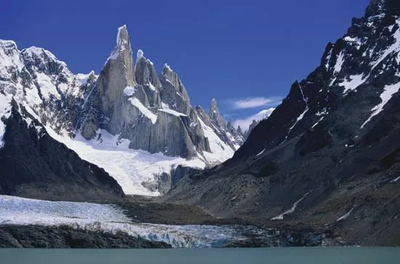

A majestic mountain range with sharp peaks and snow-capped slopes reflects in a calm lake. The image shows a breathtaking view of the Andes Mountains in Patagonia. 


In [14]:
# trial 1
generate_image_description()

Saving running_horses.jpg to running_horses.jpg


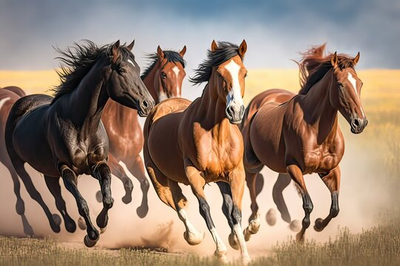

A group of five horses are running across a field. The horses are brown and black, with long flowing manes. They are running fast, kicking up dirt and grass.  One horse is black, the others are brown, and one of the brown horses has a white star on its forehead.  They look like wild horses. 


In [15]:
# trial 2
generate_image_description()

Saving desk_personal.jpeg to desk_personal.jpeg


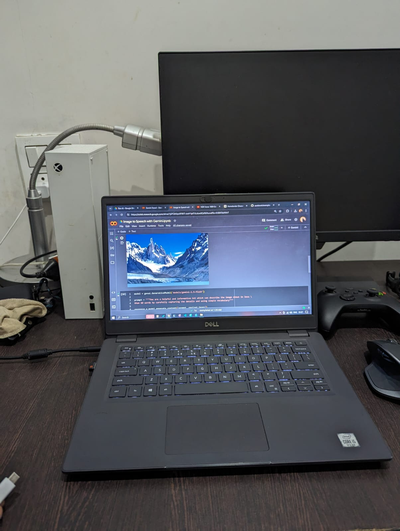

A Dell laptop with a black screen is open on a brown desk. The laptop has a white light around the keys. The laptop is sitting in front of a black monitor that is turned off.  


In [16]:
# trial 3
generate_image_description()

Saving Saoirse-Ronan-2019.webp to Saoirse-Ronan-2019.webp


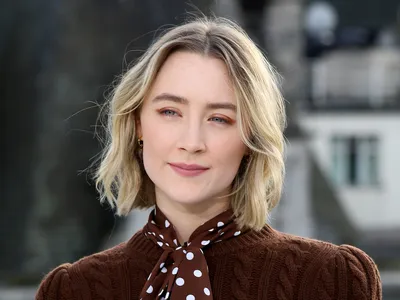

The image shows a portrait of actress Saoirse Ronan wearing a brown sweater with a white polka dot bow tie.  She has short blonde hair and is looking at the camera.

In [17]:
# trial 4
generate_image_description()